In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
#from IPython.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# Create a custom function for data transformation
features = ['datetime',
          'latitude',
          'longitude',
          'absoluteAltitude', 
          'magneticHeading',
          'trueHeading', 
          'groundSpeed', 
          'trueAirspeed',
          'pitch', 
          'roll',
          'yaw',
          'angleOfAttack',
          'flightPathAngle',
          'verticalFlightPathAngle',
          'horizontalFlightPathAngle',
          'rollAcceleration',
          'pitchAcceleration',
          'yawAcceleration',
          'e1N1ng',
          'e2N1ng',
          'e1N2nf',
          'e2N2nf',
          'mainRotorRpm',
          'tailRotorRpm',
          'mainRotorTorque',
          'e1Itt',
          'e2Itt',
          'mainRotorInducedInflow',
          'flightDirectorPitch',
          'flightDirectorRoll',
          'climbOrDescentRate', 
          'hasWeightOnWheels',
          'turnRate to degPerSec',
          'cyclicPositionPitch',
          'cyclicPositionRoll',
          'collectivePosition',
          'antiTorquePedalPosition',
          'throttlePosition',
          'e1Torque',
          'e2Torque',
]

def df_transformation(df):
    df_temp = df[features]
    df_temp['datetime'] = df_temp.datetime.dt.strftime('%Y-%m-%d %H:%M:%S').astype('datetime64[ns]')

    output = df_temp.groupby(by=["datetime"], dropna=False).mean().reset_index()
    
    return output  

In [3]:
# reading files from 9/20 dataset
first_file = pd.read_csv('SimData_2022.09.20_16.22.07.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
first_file = df_transformation(first_file)


second_file = pd.read_csv('SimData_2022.09.20_16.28.31.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
second_file = df_transformation(second_file)


C:\Users\twolf\AppData\Local\Temp\ipykernel_15604\950947015.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['datetime'] = df_temp.datetime.dt.strftime('%Y-%m-%d %H:%M:%S').astype('datetime64[ns]')
C:\Users\twolf\AppData\Local\Temp\ipykernel_15604\950947015.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['datetime'] = df_temp.datetime.dt.strftime('%Y-%m-%d %H:%M:%S').astype('datetime64[ns]')


In [4]:
df = pd.concat([first_file,second_file]).reset_index()
df

,index,datetime,latitude,longitude,absoluteAltitude,magneticHeading,trueHeading,groundSpeed,trueAirspeed,pitch,...,climbOrDescentRate,hasWeightOnWheels,turnRate to degPerSec,cyclicPositionPitch,cyclicPositionRoll,collectivePosition,antiTorquePedalPosition,throttlePosition,e1Torque,e2Torque
0,0,2022-09-20 20:22:07,39.449977,-74.584993,0.650000,32.175222,19.886000,1.742333,1.749539,2.787000,...,3.942778,0.0,-0.344556,-7.145222,-1.755778,43.350556,-6.749556,53.447444,54.815889,54.815889
1,1,2022-09-20 20:22:08,39.449982,-74.584989,0.939474,32.293053,20.003579,2.037737,2.065586,3.426684,...,13.339816,0.0,-0.249237,4.024526,-0.637526,43.419368,-6.691947,53.855500,56.059921,56.059921
2,2,2022-09-20 20:22:09,39.449991,-74.584983,1.602105,32.466921,20.177553,2.229158,2.284727,5.960763,...,31.786895,0.0,-0.127316,-8.350974,0.089816,43.846368,-6.686974,53.765184,56.152684,56.152684
3,3,2022-09-20 20:22:10,39.450000,-74.584978,2.506389,32.672500,20.383167,2.149028,2.200058,5.446833,...,48.706833,0.0,-0.011861,-4.655806,-0.398667,43.654750,-6.678250,53.635083,55.965278,55.965278
4,4,2022-09-20 20:22:11,39.450010,-74.584973,2.753750,32.770150,20.480700,2.209575,2.210113,4.934150,...,30.561375,0.0,0.037625,-5.008675,0.533225,43.526300,-5.647800,53.110525,54.661125,54.661125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176,803,2022-09-20 20:41:54,39.452050,-74.560894,0.040000,295.170277,282.869957,0.008149,0.008408,0.199787,...,-5.534085,1.0,-0.215596,-0.531723,7.949745,3.482128,-5.785191,17.533106,19.910957,19.910957
1177,804,2022-09-20 20:41:55,39.452050,-74.560894,0.040000,294.991136,282.690864,0.003977,0.004120,0.179182,...,-1.201636,1.0,-0.185500,-0.670864,8.025114,3.556909,-4.590295,0.000000,-3.994159,-3.994159
1178,805,2022-09-20 20:41:56,39.452050,-74.560894,0.040000,295.072791,282.772256,0.001465,0.001571,0.171349,...,-0.170047,1.0,-0.090674,-0.846977,7.977233,3.624000,-2.451814,0.000000,-3.022860,-3.022860
1179,806,2022-09-20 20:41:57,39.452050,-74.560894,0.040000,295.098273,282.797864,0.001477,0.001656,0.169455,...,0.012727,1.0,-0.049318,-0.881568,7.994955,3.626068,-2.208500,0.000000,-1.802227,-1.802227


In [12]:
#Add columns for surface and hover taxi maneuvers and default set value to zero
df['Surface_Taxi'] = 0
df['Hover_Taxi'] = 0
#df[['Surface_Taxi','Hover_Taxi']]

df.loc[(df['datetime'].between('2022-09-20 20:25:50' , '2022-09-20 20:27:54' , inclusive='both')),['Surface_Taxi']] = 20
df.loc[(df['datetime'].between('2022-09-20 20:28:44' , '2022-09-20 20:30:06' , inclusive='both')),['Hover_Taxi']] = 40
df.loc[(df['datetime'].between('2022-09-20 20:30:31' , '2022-09-20 20:32:16' , inclusive='both')),['Hover_Taxi']] = 40
df.loc[(df['datetime'].between('2022-09-20 20:32:39' , '2022-09-20 20:34:06' , inclusive='both')),['Hover_Taxi']] = 40
df.loc[(df['datetime'].between('2022-09-20 20:34:50' , '2022-09-20 20:36:51' , inclusive='both')),['Hover_Taxi']] = 40

[Text(0.5, 0, 'time')]

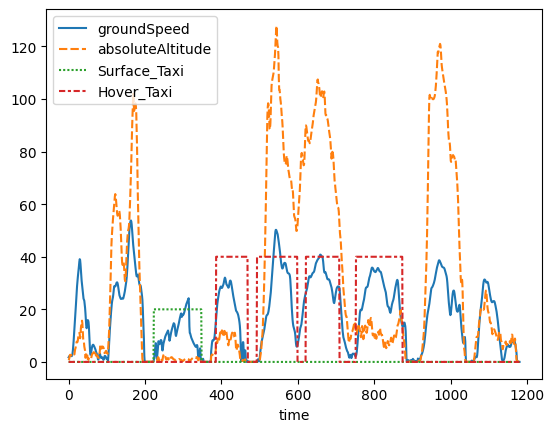

In [13]:
#Plot surface taxi vs altitude over time
df_surface_alt = df[['datetime', 'groundSpeed', 'absoluteAltitude', 'Surface_Taxi', 'Hover_Taxi']]
#sns.lineplot(x='datetime', y='absoluteAltitude',data = df)
p = sns.lineplot(data = df_surface_alt)
p.set(xlabel = 'time')
